In [6]:
# first i have imported all necessary libraries for code

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [7]:
# here i have read the data excel file and get all the headings for understanding the data.

df = pd.read_excel("FEV-data-Excel.xlsx")
df.head()

,Car full name,Make,Model,Minimal price (gross) [PLN],Engine power [KM],Maximum torque [Nm],Type of brakes,Drive type,Battery capacity [kWh],Range (WLTP) [km],...,Permissable gross weight [kg],Maximum load capacity [kg],Number of seats,Number of doors,Tire size [in],Maximum speed [kph],Boot capacity (VDA) [l],Acceleration 0-100 kph [s],Maximum DC charging power [kW],mean - Energy consumption [kWh/100 km]
0,Audi e-tron 55 quattro,Audi,e-tron 55 quattro,345700,360,664,disc (front + rear),4WD,95.0,438,...,3130.0,640.0,5,5,19,200,660.0,5.7,150,24.45
1,Audi e-tron 50 quattro,Audi,e-tron 50 quattro,308400,313,540,disc (front + rear),4WD,71.0,340,...,3040.0,670.0,5,5,19,190,660.0,6.8,150,23.80
2,Audi e-tron S quattro,Audi,e-tron S quattro,414900,503,973,disc (front + rear),4WD,95.0,364,...,3130.0,565.0,5,5,20,210,660.0,4.5,150,27.55
3,Audi e-tron Sportback 50 quattro,Audi,e-tron Sportback 50 quattro,319700,313,540,disc (front + rear),4WD,71.0,346,...,3040.0,640.0,5,5,19,190,615.0,6.8,150,23.30
4,Audi e-tron Sportback 55 quattro,Audi,e-tron Sportback 55 quattro,357000,360,664,disc (front + rear),4WD,95.0,447,...,3130.0,670.0,5,5,19,200,615.0,5.7,150,23.85


In [8]:
# Task 1: Filter and Grouping Based on Budget and Range
# a) Filter EVs under 350,000 PLN and range ≥ 400 km

# here i have use filtered df to filter out thr data that i required to perforn in task
# then use limits for EVs under 3500000 price and range more than 400


filtered_df = df[(df['Minimal price (gross) [PLN]'] <= 350000) & (df['Range (WLTP) [km]'] >= 400)]
filtered_df.head()


,Car full name,Make,Model,Minimal price (gross) [PLN],Engine power [KM],Maximum torque [Nm],Type of brakes,Drive type,Battery capacity [kWh],Range (WLTP) [km],...,Permissable gross weight [kg],Maximum load capacity [kg],Number of seats,Number of doors,Tire size [in],Maximum speed [kph],Boot capacity (VDA) [l],Acceleration 0-100 kph [s],Maximum DC charging power [kW],mean - Energy consumption [kWh/100 km]
0,Audi e-tron 55 quattro,Audi,e-tron 55 quattro,345700,360,664,disc (front + rear),4WD,95.0,438,...,3130.0,640.0,5,5,19,200,660.0,5.7,150,24.45
8,BMW iX3,BMW,iX3,282900,286,400,disc (front + rear),2WD (rear),80.0,460,...,2725.0,540.0,5,5,19,180,510.0,6.8,150,18.80
15,Hyundai Kona electric 64kWh,Hyundai,Kona electric 64kWh,178400,204,395,disc (front + rear),2WD (front),64.0,449,...,2170.0,485.0,5,5,17,167,332.0,7.6,100,15.40
18,Kia e-Niro 64kWh,Kia,e-Niro 64kWh,167990,204,395,disc (front + rear),2WD (front),64.0,455,...,2230.0,493.0,5,5,17,167,451.0,7.8,100,15.90
20,Kia e-Soul 64kWh,Kia,e-Soul 64kWh,160990,204,395,disc (front + rear),2WD (front),64.0,452,...,1682.0,498.0,5,5,17,167,315.0,7.9,100,15.70


In [5]:
#b) Group by Manufacturer (Make)

# here i have use groupe

grouped_by_make = filtered_df.groupby('Make')
grouped_by_make.size().sort_values(ascending=False)

Make
Tesla            3
Volkswagen       3
Kia              2
Audi             1
BMW              1
Hyundai          1
Mercedes-Benz    1
dtype: int64

In [6]:
#c) Calculate average battery capacity per manufacturer

avg_battery_capacity = grouped_by_make['Battery capacity [kWh]'].mean().sort_values(ascending=False)
avg_battery_capacity

Make
Audi             95.000000
BMW              80.000000
Mercedes-Benz    80.000000
Volkswagen       70.666667
Tesla            68.000000
Hyundai          64.000000
Kia              64.000000
Name: Battery capacity [kWh], dtype: float64

In [5]:
df = pd.read_excel("FEV-data-Excel.xlsx")

df.head()


,Car full name,Make,Model,Minimal price (gross) [PLN],Engine power [KM],Maximum torque [Nm],Type of brakes,Drive type,Battery capacity [kWh],Range (WLTP) [km],...,Permissable gross weight [kg],Maximum load capacity [kg],Number of seats,Number of doors,Tire size [in],Maximum speed [kph],Boot capacity (VDA) [l],Acceleration 0-100 kph [s],Maximum DC charging power [kW],mean - Energy consumption [kWh/100 km]
0,Audi e-tron 55 quattro,Audi,e-tron 55 quattro,345700,360,664,disc (front + rear),4WD,95.0,438,...,3130.0,640.0,5,5,19,200,660.0,5.7,150,24.45
1,Audi e-tron 50 quattro,Audi,e-tron 50 quattro,308400,313,540,disc (front + rear),4WD,71.0,340,...,3040.0,670.0,5,5,19,190,660.0,6.8,150,23.80
2,Audi e-tron S quattro,Audi,e-tron S quattro,414900,503,973,disc (front + rear),4WD,95.0,364,...,3130.0,565.0,5,5,20,210,660.0,4.5,150,27.55
3,Audi e-tron Sportback 50 quattro,Audi,e-tron Sportback 50 quattro,319700,313,540,disc (front + rear),4WD,71.0,346,...,3040.0,640.0,5,5,19,190,615.0,6.8,150,23.30
4,Audi e-tron Sportback 55 quattro,Audi,e-tron Sportback 55 quattro,357000,360,664,disc (front + rear),4WD,95.0,447,...,3130.0,670.0,5,5,19,200,615.0,5.7,150,23.85


In [6]:
# Task 2: Find Outliers in Energy Consumption
# Using IQR method:


print(df.columns.tolist())

col = 'mean - Energy consumption [kWh/100 km]'

#cleaned any missing data
df = df.dropna(subset=[col])


Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
print("Number of outliers:", outliers.shape[0])
outliers




['Car full name', 'Make', 'Model', 'Minimal price (gross) [PLN]', 'Engine power [KM]', 'Maximum torque [Nm]', 'Type of brakes', 'Drive type', 'Battery capacity [kWh]', 'Range (WLTP) [km]', 'Wheelbase [cm]', 'Length [cm]', 'Width [cm]', 'Height [cm]', 'Minimal empty weight [kg]', 'Permissable gross weight [kg]', 'Maximum load capacity [kg]', 'Number of seats', 'Number of doors', 'Tire size [in]', 'Maximum speed [kph]', 'Boot capacity (VDA) [l]', 'Acceleration 0-100 kph [s]', 'Maximum DC charging power [kW]', 'mean - Energy consumption [kWh/100 km]']
Number of outliers: 0


,Car full name,Make,Model,Minimal price (gross) [PLN],Engine power [KM],Maximum torque [Nm],Type of brakes,Drive type,Battery capacity [kWh],Range (WLTP) [km],...,Permissable gross weight [kg],Maximum load capacity [kg],Number of seats,Number of doors,Tire size [in],Maximum speed [kph],Boot capacity (VDA) [l],Acceleration 0-100 kph [s],Maximum DC charging power [kW],mean - Energy consumption [kWh/100 km]


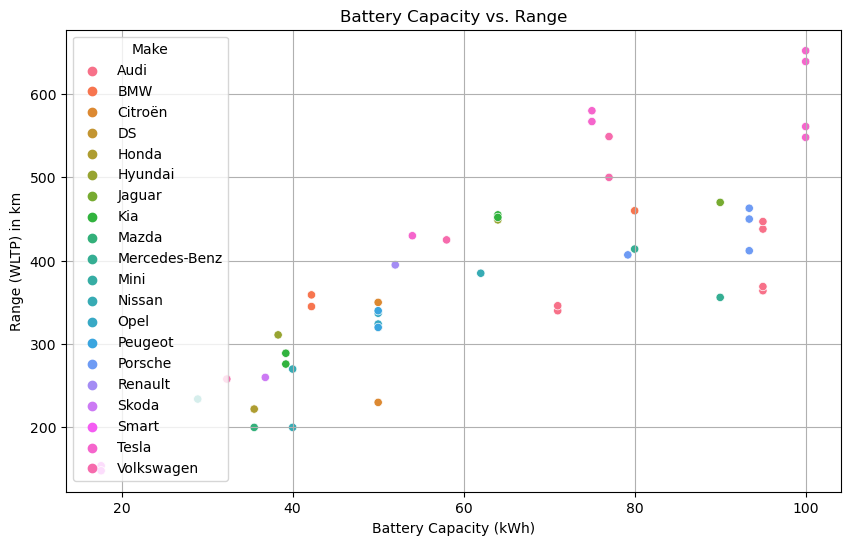

In [10]:
#Task 3: Battery Capacity vs Range
#a) Created a scatter plot

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Battery capacity [kWh]', y='Range (WLTP) [km]', hue='Make')
plt.title("Battery Capacity vs. Range")
plt.xlabel("Battery Capacity (kWh)")
plt.ylabel("Range (WLTP) in km")
plt.grid(True)
plt.show()

In [11]:
# Task 4: EV Recommendation Class

class EVRecommender:
    def __init__(self, dataframe):
        self.df = dataframe

    def recommend(self, budget, min_range, min_battery_capacity):
        filtered = self.df[
            (self.df['Minimal price (gross) [PLN]'] <= budget) &
            (self.df['Range (WLTP) [km]'] >= min_range) &
            (self.df['Battery capacity [kWh]'] >= min_battery_capacity)
        ]
        top_3 = filtered.sort_values(by='Range (WLTP) [km]', ascending=False).head(3)
        return top_3[['Car full name', 'Minimal price (gross) [PLN]', 'Range (WLTP) [km]', 'Battery capacity [kWh]']]


recommender = EVRecommender(df)
recommender.recommend(budget=350000, min_range=400, min_battery_capacity=60)


,Car full name,Minimal price (gross) [PLN],Range (WLTP) [km],Battery capacity [kWh]
40,Tesla Model 3 Long Range,235490,580,75.0
41,Tesla Model 3 Performance,260490,567,75.0
48,Volkswagen ID.3 Pro S,179990,549,77.0


In [12]:
# Task 5: Hypothesis Testing
#a) Filtered Tesla and Audi

tesla_power = df[df['Make'] == 'Tesla']['Engine power [KM]'].dropna()
audi_power = df[df['Make'] == 'Audi']['Engine power [KM]'].dropna()

t_stat, p_val = ttest_ind(tesla_power, audi_power, equal_var=False)
t_stat, p_val

(1.7939951827297178, 0.10684105068839565)